<a href="https://colab.research.google.com/github/wali21009/EkstraksiWatershed_009_028/blob/main/EkstraksiWatershed2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Number of objects:  3


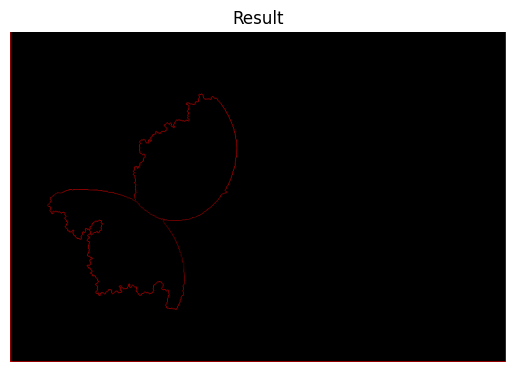

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img = cv2.imread('mango.jpeg')

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Threshold the image
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

# Morphological opening
kernel = np.ones((3,3), np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel,iterations=2)

# Sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=3)

# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)

# Add one to all labels so that sure background is not 0, but 1
markers = markers+1

# Now, mark the region of unknown with zero
markers[unknown==255] = 0

# Apply watershed
markers = cv2.watershed(img,markers)

# Create a mask for the watershed region
mask = np.zeros_like(img)
mask[markers == -1] = [0, 0, 255]

# Apply the mask to the original image
result = cv2.bitwise_and(img, mask)

# Count the number of objects
num_objects = markers.max() - 1

print('Number of objects: ', num_objects)

# Show the result
plt.imshow(result[:,:,::-1])
plt.title('Result')
plt.axis('off')
plt.show()